# **Assignment: Wine Quality Prediction Using ElasticNet Regression**

## **Objective**
The goal of this assignment is to predict the quality of wine based on its physicochemical properties using the **ElasticNet regression algorithm**. You will analyze the dataset, preprocess the data, build the regression model, and evaluate its performance.

### **Dataset Overview**
The Wine Quality dataset contains physicochemical attributes of Portuguese "Vinho Verde" wine samples (both red and white), along with quality ratings. The objective is to model wine quality based on these physicochemical characteristics. The dataset is frequently used in regression and classification tasks in machine learning.ms


#### **Dataset Source**
- [UCI Machine Learning Repository - Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- Citation: "*Modeling wine preferences by data mining from physicochemical properties*," by P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis. 2009 Published in Decision Support Systems

### **Columns in the CSV File**
The dataset is presented as a CSV file with the following columns:

| **Column Name**         | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| `fixed acidity`          | Concentration of non-volatile acids (e.g., tartaric acid), expressed in g/dm³. |
| `volatile acidity`       | Concentration of acetic acid, which can affect the taste negatively (g/dm³).   |
| `citric acid`            | Concentration of citric acid, contributing to freshness and taste (g/dm³).     |
| `residual sugar`         | Amount of sugar left after fermentation (g/dm³).                               |
| `chlorides`              | Salt content (g/dm³).                                                          |
| `free sulfur dioxide`    | SO2 in free form; prevents microbial growth and oxidation (mg/dm³).            |
| `total sulfur dioxide`   | Total SO2 content, both free and bound forms (mg/dm³).                         |
| `density`                | Density of the wine; depends on alcohol and sugar (g/cm³).                     |
| `pH`                     | Measure of acidity or basicity of the wine.                                    |
| `sulphates`              | Potassium sulphate level, contributing to flavor (g/dm³).                      |
| `alcohol`                | Alcohol content by volume (%).                                                 |
| `quality`                | Target variable: Quality score of the wine (0 to 10, integer).                 |

---

### **Key Notes**
- **Data Characteristics**: All features are continuous and numeric, except for the `quality` column, which is an ordinal variable.
- **Use Cases**: This dataset is ideal for regression tasks (predicting `quality`) or classification tasks (grouping wine into quality categories).
- **Applications**: It has been used for predictive modeling in wine quality assessment and feature importance analysis.

The dataset provides a real-world scenario for exploring the relationships between physicochemical properties and wine quality.

#### **Number of Attributes**
- **Features (Input Variables)**: 11 continuous numerical attributes
- **Target Variable (Output)**: Wine quality (integer score from 0 to 10)

# **Problem Statement**
You are tasked with developing a predictive model to estimate wine quality scores (target variable) based on a set of physicochemical attributes (input features). Your analysis should include data exploration, preprocessing, modeling, and evaluation steps.

## **Dataset**
   - Use the **Wine Quality Dataset** available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
   - Dataset URL: [Wine CSV](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
   - Hint: `read_csv` has special provisions to read datasets directly from URLs into Pandas DataFrames.
   - Caution: while using `read_csv` with URLs, you need to make sure to specify the separator. So, for example, a valid usage would be
  ```python
    pd.read_csv(url, sep=';')
  ```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Print the first 10 rows of your DataFrame.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep =';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
data.describe()  #a.summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum() #a. no missing values?

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
round(data['citric acid'].mean(), 2)

np.float64(0.27)

In [ ]:
data.isnull().sum().sum() #checking again general number of missing values - but, how i see, this dataset already cleaned;

np.int64(0)

In [ ]:
data ['total sulfur dioxide'].quantile(0.75)

np.float64(62.0)

In [ ]:
round (data['quality'].mean (), 2)

np.float64(5.64)

In [ ]:
data['quality'].max()  #the best wine?

np.int64(8)

* Display summary statistics and check for missing values.
* What is the mean value of Citric Acid content in the dataset?
* How many missing values are there?
* What is the 3rd quartile of Total Sulfur Dioxide content?
* What is the mean quality of wines in the dataset?
* If `quality=0` describes the worst wine, what is the quality of the best wine in the dataset?

### **Data Visualization**
Visualize the relation between (a) wine quality and total sulfur dioxide, and (b) wine quality and pH as scatterplots. Remember to select the right `hue`.

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

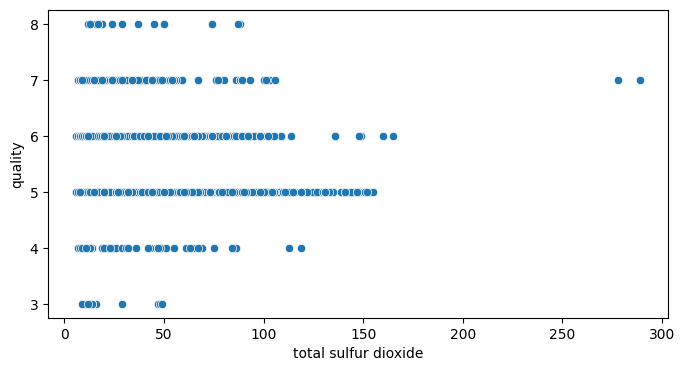

In [ ]:
plt.figure(figsize = (8, 4))
sn.scatterplot(data = data, x = 'total sulfur dioxide', y = 'quality')

<Axes: xlabel='pH', ylabel='quality'>

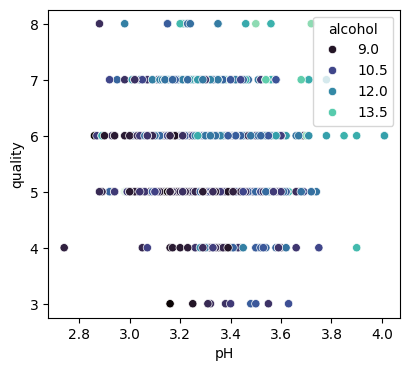

In [ ]:
plt.figure(figsize = (10, 4))
plt.subplot (1, 2, 1)
sn.scatterplot(data = data, x = 'pH', y = 'quality', hue = 'alcohol', palette = 'mako')

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set shape (X_train): {X_train.shape}, (y_train): {y_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}, (y_test): {y_test.shape}")

Training set shape (X_train): (1279, 11), (y_train): (1279,)
Testing set shape (X_test): (320, 11), (y_test): (320,)


**Data Preprocessing**:
- Scale the features using the `StandardScaler`standardization technique.
- Split the data into training and testing sets (e.g., 80% training, 20% testing).

**Model Building**:
- Implement the **ElasticNet regression** algorithm using Scikit-Learn.
- Explain in your own words what the `alpha` and `l1_ratio` parameters do. You will need to carefully examine the Scikit-Learn Documentation for `ElascitNet` to answer this question.
- [Link to](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) ElasticNet documentation.
- Experiment with different values of `alpha` and `l1_ratio` to find the best combination for your model.

* Test your output using the following benchmark parameters: `alpha=1.0`, `l1_ratio=0.5`, `random_state=42`
* Mean Squared Error with the above parameters should be $\approx 0.657$

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Elastic_Net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42) #elastic net with given in task parameters

Elastic_Net.fit(X_train, y_train) #some training our current model

y_pred = Elastic_Net.predict(X_test) # test set prediction

mse = mean_squared_error(y_test, y_pred) #calculations of mse
print(f"Mean Squared Error: {mse:.3f}")

r2 = r2_score(y_test, y_pred) #calculations of rsquare
print(f"Rsquared: {r2:.3f}")

Mean Squared Error: 0.657
Rsquared: -0.006


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Hyperparameter Tuning

* Instead of `ElasticNet`, we will now use `ELasticNetCV` that also permits Cross Validation.
* Train an `ElasticNetCV` model on this dataset with the following parameters: `alphas=[0.01, 0.1, 1.0, 10.0]`, `l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9]`, and, as before, `random_state=42`.

ElasticNetCV(alphas=[0.01, 0.1, 1.0, 10.0],
             l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9], random_state=42)

* What are the best values of `alpha` and `l1_ratio`?
* Did using cross validation help in any way? Quantify the improvement or lack thereof.

In [ ]:
from sklearn.linear_model import ElasticNetCV

Elastic_Net_CV = ElasticNetCV(  alphas=[0.01, 0.1, 1.0, 10.0], l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9], cv=5,
    random_state=42) # inisializing ElasticNetCV with given alphas and l1_ratios

Elastic_Net_CV.fit(X_train, y_train) #training in train dataset

Best_Alpha = Elastic_Net_CV.alpha_ #getting best aplha
Best_l1_ratio = Elastic_Net_CV.l1_ratio_ #getting best ratio
print(f"Best Alpha: {Best_Alpha}")
print(f"Best l1_ratio: {Best_l1_ratio}")


Best Alpha: 0.01
Best l1_ratio: 0.9


In [ ]:
y_pred_CV = Elastic_Net_CV.predict(X_test) #predicting in test dataset

mse_CV = mean_squared_error(y_test, y_pred_CV) #calculations of mse
r2_CV = r2_score(y_test, y_pred_CV) #calculations of r square

print(f"Mean Squared Erroron Test Data: {mse_CV:.3f}")
print(f"R squared on Test Data: {r2_CV:.3f}")

Mean Squared Erroron Test Data: 0.393
R squared on Test Data: 0.399


In [ ]:
improvement_mse = mse - mse_CV
print(f"Improvement in MSE: {improvement_mse:.3f}")

improvement_r2 = r2_CV - r2
print(f"Improvement in R square: {improvement_r2:.3f}")


Improvement in MSE: 0.264
Improvement in R square: 0.405
